In [1]:
import numpy as np  #numerical computing
import matplotlib.pyplot as plt    #data visualization
import pandas as pd       #manipulate data in tabular format (load data and handle missing value)
import seaborn as sns; sns.set()     #drawing statistical graphics(modeling)

#Scikit-learn is a machine learning library that provides simple and efficient tools
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  
from sklearn.preprocessing import StandardScaler #scaling
#regression model 
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
#evaluate model 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import warnings
warnings.filterwarnings('ignore')

In [2]:
#LOAD DATASET
house_rent_dataset = pd.read_csv("/Users/yangshence/Desktop/ds_research/dataset/House_Rent_Dataset.csv")
house_rent_dataset.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
house_rent_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


In [6]:
house_rent_dataset.describe()

,BHK,Rent,Size,Bathroom
count,4746.000000,4.746000e+03,4746.000000,4746.000000
mean,2.083860,3.499345e+04,967.490729,1.965866
std,0.832256,7.810641e+04,634.202328,0.884532
min,1.000000,1.200000e+03,10.000000,1.000000
25%,2.000000,1.000000e+04,550.000000,1.000000
50%,2.000000,1.600000e+04,850.000000,2.000000
75%,3.000000,3.300000e+04,1200.000000,2.000000
max,6.000000,3.500000e+06,8000.000000,10.000000


In [7]:
'''cleaning'''
#check missing values for all cols --> NO missing value
house_rent_dataset.isnull().sum()


Posted On            0
BHK                  0
Rent                 0
Size                 0
Floor                0
Area Type            0
Area Locality        0
City                 0
Furnishing Status    0
Tenant Preferred     0
Bathroom             0
Point of Contact     0
dtype: int64

In [11]:
print(np.where(house_rent_dataset['Rent']>2000000))

# Dropping the rows with high rent
house_rent_dataset.drop([1837], axis=0, inplace=True)

(array([1836]),)


In [13]:
print(house_rent_dataset['Rent']>2000000)

1       False
2       False
3       False
4       False
5       False
        ...  
4741    False
4742    False
4743    False
4744    False
4745    False
Name: Rent, Length: 4744, dtype: bool


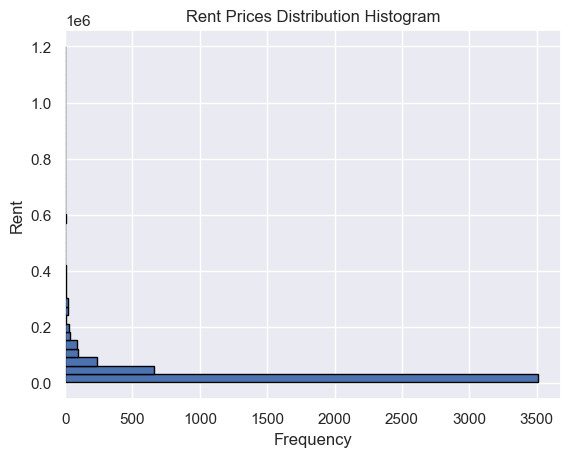

In [14]:
# Visualization
x = house_rent_dataset.Rent
plt.hist(x,orientation='horizontal',ec='black',bins=40)
plt.title('Rent Prices Distribution Histogram')
plt.xlabel('Frequency')
plt.ylabel('Rent')
plt.show()


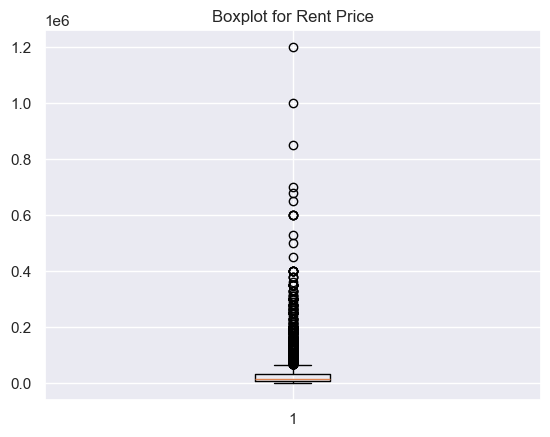

In [15]:
plt.boxplot(house_rent_dataset['Rent'])
plt.title('Boxplot for Rent Price')
plt.show()

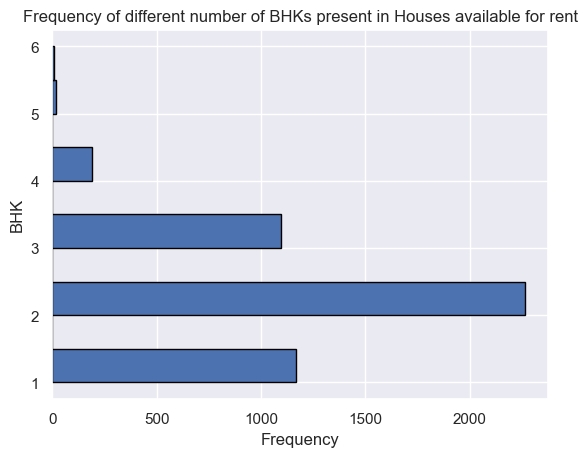

In [16]:
x = house_rent_dataset.BHK
plt.hist(x,orientation='horizontal',ec='black')
plt.title('Frequency of different number of BHKs present in Houses available for rent')
plt.xlabel('Frequency')
plt.ylabel('BHK')
plt.show()

BHK
2    2264
1    1167
3    1097
4     189
5      19
6       8
Name: count, dtype: int64


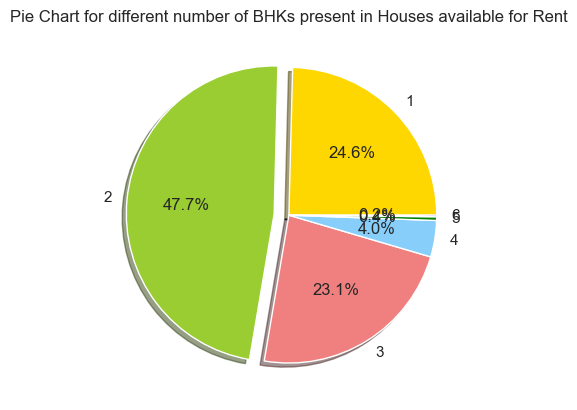

In [17]:
category_counts = house_rent_dataset.BHK.value_counts()  
print(category_counts)
sizes = [1167, 2265, 1097, 189,19,8]   
labels = ['1', '2', '3', '4','5','6']   
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','blue']
explode = (0, 0.1, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)  
plt.title('Pie Chart for different number of BHKs present in Houses available for Rent')
plt.show()

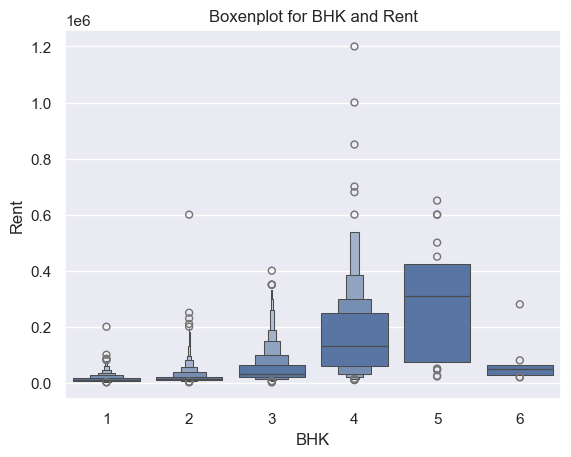

In [18]:
fig,axes = plt.subplots()
sns.boxenplot(x=house_rent_dataset.BHK,y=house_rent_dataset.Rent)
plt.title('Boxenplot for BHK and Rent')
plt.show()

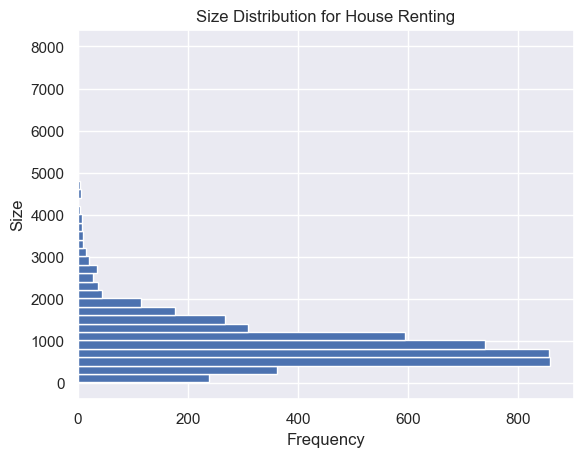

In [19]:
x = house_rent_dataset.Size
plt.hist(x,orientation='horizontal',bins=40)
plt.title('Size Distribution for House Renting')
plt.xlabel('Frequency')
plt.ylabel('Size')
plt.show()

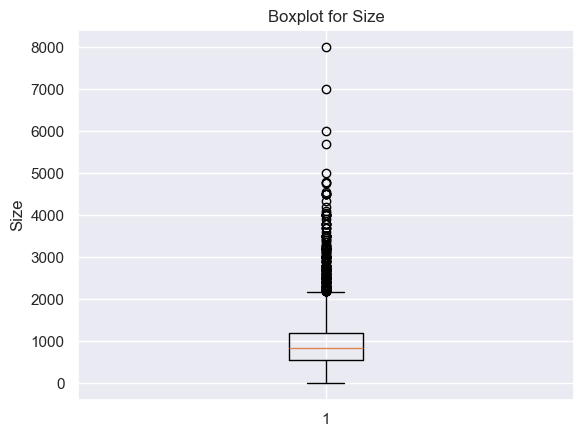

In [20]:
plt.boxplot(x=house_rent_dataset.Size)
plt.title('Boxplot for Size')
plt.ylabel('Size')
plt.show()

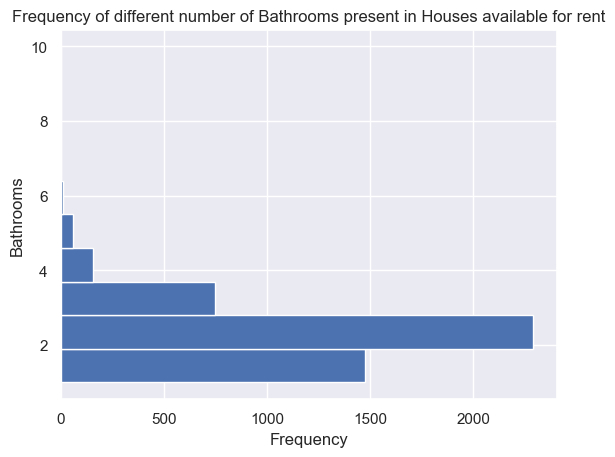

In [21]:
x = house_rent_dataset.Bathroom
plt.hist(x,orientation='horizontal')
plt.title('Frequency of different number of Bathrooms present in Houses available for rent')
plt.xlabel('Frequency')
plt.ylabel('Bathrooms')
plt.show()

Bathroom
2     2290
1     1474
3      748
4      156
5       60
6       12
7        3
10       1
Name: count, dtype: int64


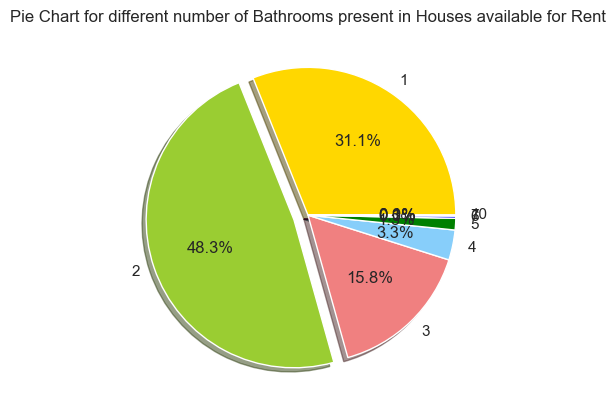

In [22]:
category_counts = house_rent_dataset.Bathroom.value_counts()  
print(category_counts)
sizes = [1474, 2291, 748, 156,60,12,3,1]   
labels = ['1', '2', '3', '4','5','6','7','10']   
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','green','blue','red','purple']
explode = (0, 0.1, 0, 0, 0, 0, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)  
plt.title('Pie Chart for different number of Bathrooms present in Houses available for Rent')
plt.show()

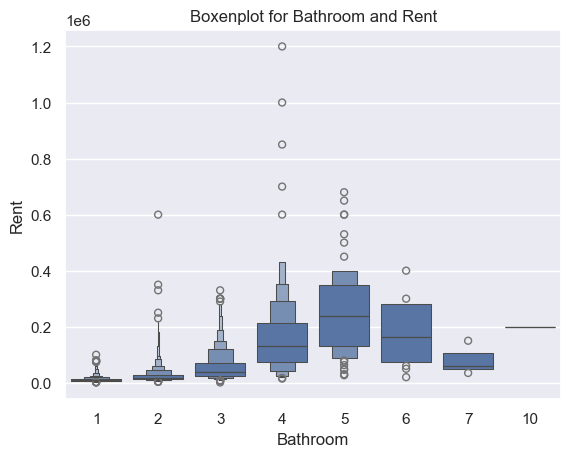

In [23]:
fig,axes = plt.subplots()
sns.boxenplot(x=house_rent_dataset.Bathroom,y=house_rent_dataset.Rent)
plt.title('Boxenplot for Bathroom and Rent')
plt.show()

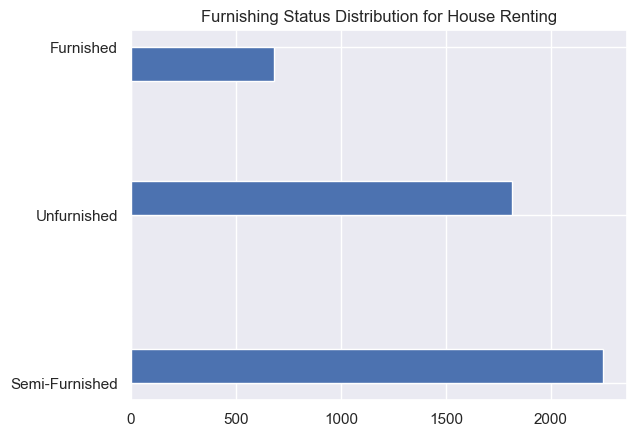

In [24]:
x = house_rent_dataset['Furnishing Status']
plt.hist(x,orientation='horizontal')
plt.title('Furnishing Status Distribution for House Renting')
plt.show()

Furnishing Status
Semi-Furnished    2250
Unfurnished       1814
Furnished          680
Name: count, dtype: int64


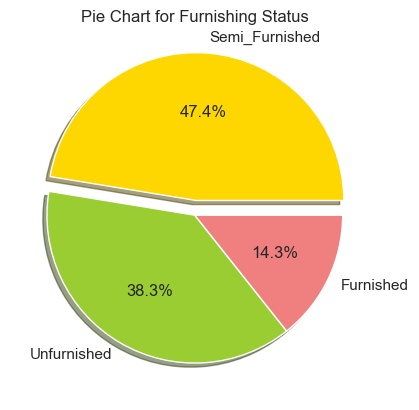

In [25]:
category_counts = house_rent_dataset['Furnishing Status'].value_counts()  
print(category_counts)
sizes = [2250,1815, 680]   
labels = ['Semi_Furnished', 'Unfurnished', 'Furnished']   
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0.1, 0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)  
plt.title('Pie Chart for Furnishing Status')
plt.show()

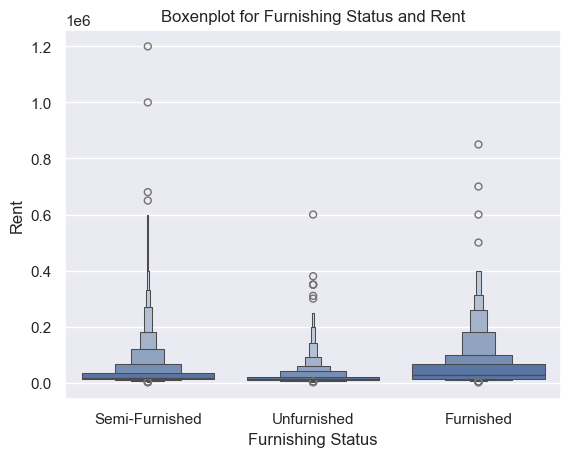

In [26]:
fig,axes = plt.subplots()
sns.boxenplot(x=house_rent_dataset['Furnishing Status'],y=house_rent_dataset.Rent)
plt.title('Boxenplot for Furnishing Status and Rent')
plt.show()

In [27]:
#DATA PREPROCESSING 

#one hot encoding 
categorical_vars = ['Area Type','Area Locality','City','Furnishing Status','Tenant Preferred','Point of Contact']
# One-hot encode the categorical variables
for col in categorical_vars:
    one_hot_encoded = pd.get_dummies(house_rent_dataset[col], dtype=int, prefix=col, drop_first=True)
    house_rent_dataset = house_rent_dataset.join(one_hot_encoded)
    house_rent_dataset.drop(col, axis=1, inplace=True)  # Drop the original categorical column

house_rent_dataset

   


,Posted On,BHK,Rent,Size,Floor,Bathroom,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ in Boduppal, NH 2 2","Area Locality_ in Erragadda, NH 9",...,City_Delhi,City_Hyderabad,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
2,2022-05-16,2,17000,1000,1 out of 3,1,0,1,0,0,...,0,0,1,0,1,0,1,0,0,1
3,2022-07-04,2,10000,800,1 out of 2,1,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
4,2022-05-09,2,7500,850,1 out of 2,1,1,0,0,0,...,0,0,1,0,0,1,0,0,0,1
5,2022-04-29,2,7000,600,Ground out of 1,2,0,1,0,0,...,0,0,1,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2022-05-18,2,15000,1000,3 out of 5,2,1,0,0,0,...,0,1,0,0,1,0,1,0,0,1
4742,2022-05-15,3,29000,2000,1 out of 4,3,0,1,0,0,...,0,1,0,0,1,0,1,0,0,1
4743,2022-07-10,3,35000,1750,3 out of 5,3,1,0,0,0,...,0,1,0,0,1,0,1,0,0,0
4744,2022-07-06,3,45000,1500,23 out of 34,2,1,0,0,0,...,0,1,0,0,1,0,0,1,0,0


In [28]:
#handle floor 

house_rent_dataset["Floor Number"]=house_rent_dataset['Floor'].apply(lambda x:str(x).split()[0])
house_rent_dataset["Total Floor"]=house_rent_dataset["Floor"].apply(lambda x:str(x).split()[-1])
del house_rent_dataset["Floor"]

#change the ground to zero
#lower basement means "-2",and Upper basement is -1.
house_rent_dataset["Floor Number"] = house_rent_dataset["Floor Number"].replace(['Ground'],0)
house_rent_dataset["Floor Number"] = house_rent_dataset["Floor Number"].replace(['Lower'],-2)
house_rent_dataset["Floor Number"] = house_rent_dataset["Floor Number"].replace(['Upper'],-1)
house_rent_dataset["Floor Number"] = house_rent_dataset["Floor Number"].replace(['Ground'],0)
house_rent_dataset["Total Floor"] = house_rent_dataset["Total Floor"].replace(['Ground'],1)
house_rent_dataset.head()


,Posted On,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ in Boduppal, NH 2 2","Area Locality_ in Erragadda, NH 9","Area Locality_ in Miyapur, NH 9",...,City_Kolkata,City_Mumbai,Furnishing Status_Semi-Furnished,Furnishing Status_Unfurnished,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor Number,Total Floor
1,2022-05-13,2,20000,800,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,3
2,2022-05-16,2,17000,1000,1,0,1,0,0,0,...,1,0,1,0,1,0,0,1,1,3
3,2022-07-04,2,10000,800,1,0,1,0,0,0,...,1,0,0,1,1,0,0,1,1,2
4,2022-05-09,2,7500,850,1,1,0,0,0,0,...,1,0,0,1,0,0,0,1,1,2
5,2022-04-29,2,7000,600,2,0,1,0,0,0,...,1,0,0,1,1,0,0,1,0,1


In [29]:
#handle date
house_rent_dataset['Posted On'] = pd.to_datetime(house_rent_dataset["Posted On"])
house_rent_dataset['month posted'] = house_rent_dataset['Posted On'].dt.month
house_rent_dataset['day posted'] = house_rent_dataset['Posted On'].dt.day
house_rent_dataset['day of week posted'] = house_rent_dataset['Posted On'].dt.day_of_week
house_rent_dataset['quarter poster'] = house_rent_dataset['Posted On'].dt.quarter
del house_rent_dataset['Posted On']
house_rent_dataset



,BHK,Rent,Size,Bathroom,Area Type_Carpet Area,Area Type_Super Area,"Area Locality_ in Boduppal, NH 2 2","Area Locality_ in Erragadda, NH 9","Area Locality_ in Miyapur, NH 9","Area Locality_117 Residency, Chembur East",...,Tenant Preferred_Bachelors/Family,Tenant Preferred_Family,Point of Contact_Contact Builder,Point of Contact_Contact Owner,Floor Number,Total Floor,month posted,day posted,day of week posted,quarter poster
1,2,20000,800,1,0,1,0,0,0,0,...,1,0,0,1,1,3,5,13,4,2
2,2,17000,1000,1,0,1,0,0,0,0,...,1,0,0,1,1,3,5,16,0,2
3,2,10000,800,1,0,1,0,0,0,0,...,1,0,0,1,1,2,7,4,0,3
4,2,7500,850,1,1,0,0,0,0,0,...,0,0,0,1,1,2,5,9,0,2
5,2,7000,600,2,0,1,0,0,0,0,...,1,0,0,1,0,1,4,29,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4741,2,15000,1000,2,1,0,0,0,0,0,...,1,0,0,1,3,5,5,18,2,2
4742,3,29000,2000,3,0,1,0,0,0,0,...,1,0,0,1,1,4,5,15,6,2
4743,3,35000,1750,3,1,0,0,0,0,0,...,1,0,0,0,3,5,7,10,6,3
4744,3,45000,1500,2,1,0,0,0,0,0,...,0,1,0,0,23,34,7,6,2,3


In [30]:
#choose features(x) and target(y)
x = house_rent_dataset.drop('Rent',axis=1) #where 1 is the axis number (0 for rows and 1 for columns.)
y = house_rent_dataset['Rent']



In [31]:
'''kfold to split into training set and testing set '''

# Initialize K-Fold Cross-Validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Initialize lists to store evaluation metrics for Linear Regression
mae_lm_list = []
mse_lm_list = []
rmse_lm_list = []
r2_lm_list = []

# Initialize lists to store evaluation metrics for Decision Tree Regressor
mae_dt_list = []
mse_dt_list = []
rmse_dt_list = []
r2_dt_list = []

# Initialize lists to store evaluation metrics for Random Forest Regressor
mae_rf_list = []
mse_rf_list = []
rmse_rf_list = []
r2_rf_list = []

# K-Fold Cross-Validation
for train_index, test_index in kf.split(x):
    X_train, X_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Scaling the data
    sc_X = StandardScaler()
    sc_y = StandardScaler()
    
    X_train = sc_X.fit_transform(X_train)
    X_test = sc_X.transform(X_test)  # Use transform instead of fit_transform for test set
    y_train = y_train.values.reshape(-1, 1)
    y_test = y_test.values.reshape(-1, 1)
    
    y_train = sc_y.fit_transform(y_train)
    y_test = sc_y.transform(y_test)  # Use transform instead of fit_transform for test set

    # Linear regression
    lm = LinearRegression()
    lm.fit(X_train, y_train)
    lm_prediction = lm.predict(X_test)

    # Evaluation metrics for Linear Regression
    mae_lm = metrics.mean_absolute_error(y_test, lm_prediction)
    mse_lm = metrics.mean_squared_error(y_test, lm_prediction)
    rmse_lm = np.sqrt(mse_lm)
    r2_lm = metrics.r2_score(y_test, lm_prediction)
    
    # Append metrics to lists for Linear Regression
    mae_lm_list.append(mae_lm)
    mse_lm_list.append(mse_lm)
    rmse_lm_list.append(rmse_lm)
    r2_lm_list.append(r2_lm)

    # Decision Tree Regressor
    dt = DecisionTreeRegressor(random_state=100)
    dt.fit(X_train, y_train)
    dt_prediction = dt.predict(X_test)

    # Evaluation metrics for Decision Tree Regressor
    mae_dt = metrics.mean_absolute_error(y_test, dt_prediction)
    mse_dt = metrics.mean_squared_error(y_test, dt_prediction)
    rmse_dt = np.sqrt(mse_dt)
    r2_dt = metrics.r2_score(y_test, dt_prediction)
    
    # Append metrics to lists for Decision Tree Regressor
    mae_dt_list.append(mae_dt)
    mse_dt_list.append(mse_dt)
    rmse_dt_list.append(rmse_dt)
    r2_dt_list.append(r2_dt)

    # Random Forest Regressor
    rf = RandomForestRegressor(n_estimators=100, random_state=100)
    rf.fit(X_train, y_train.ravel())
    rf_prediction = rf.predict(X_test)

    # Evaluation metrics for Random Forest Regressor
    mae_rf = metrics.mean_absolute_error(y_test, rf_prediction)
    mse_rf = metrics.mean_squared_error(y_test, rf_prediction)
    rmse_rf = np.sqrt(mse_rf)
    r2_rf = metrics.r2_score(y_test, rf_prediction)
    
    # Append metrics to lists for Random Forest Regressor
    mae_rf_list.append(mae_rf)
    mse_rf_list.append(mse_rf)
    rmse_rf_list.append(rmse_rf)
    r2_rf_list.append(r2_rf)


# Calculate average of the metrics for Linear Regression
mae_lm_avg = np.mean(mae_lm_list)
mse_lm_avg = np.mean(mse_lm_list)
rmse_lm_avg = np.mean(rmse_lm_list)
r2_lm_avg = np.mean(r2_lm_list)

# Calculate average of the metrics for Decision Tree Regressor
mae_dt_avg = np.mean(mae_dt_list)
mse_dt_avg = np.mean(mse_dt_list)
rmse_dt_avg = np.mean(rmse_dt_list)
r2_dt_avg = np.mean(r2_dt_list)


# Calculate average of the metrics for Random Forest Regressor
mae_rf_avg = np.mean(mae_rf_list)
mse_rf_avg = np.mean(mse_rf_list)
rmse_rf_avg = np.mean(rmse_rf_list)
r2_rf_avg = np.mean(r2_rf_list)



print('Linear Regression:')
print('Average MAE:', mae_lm_avg)
print('Average MSE:', mse_lm_avg)
print('Average RMSE:', rmse_lm_avg)
print('Average R2:', r2_lm_avg)

print('\nDecision Tree Regressor:')
print('Average MAE:', mae_dt_avg)
print('Average MSE:', mse_dt_avg)
print('Average RMSE:', rmse_dt_avg)
print('Average R2:', r2_dt_avg)

print('\nRandom Forest Regressor:')
print('Average MAE:', mae_rf_avg)
print('Average MSE:', mse_rf_avg)
print('Average RMSE:', rmse_rf_avg)
print('Average R2:', r2_rf_avg)

Linear Regression:
Average MAE: 773303507790.3014
Average MSE: 6.828361383980733e+24
Average RMSE: 2326141463267.2144
Average R2: -9.2361665385052e+24

Decision Tree Regressor:
Average MAE: 0.21794491984684433
Average MSE: 0.3972929759369991
Average RMSE: 0.6095365766864367
Average R2: 0.6326639986290103

Random Forest Regressor:
Average MAE: 0.17714102454982888
Average MSE: 0.29293464801742664
Average RMSE: 0.5203900967704168
Average R2: 0.7330588570338291
